In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [2]:
dataset = []
with open("./OUTPUT/Text/dataset.json") as dataset_file:
    file = json.load(dataset_file)
    for line in file:
        image = cv2.imread(os.path.join("./OUTPUT/Text/", line["image_path"]))
        image = 255 - image
        image = cv2.resize(image, (60, 60), interpolation= cv2.INTER_NEAREST)
        image = cv2.copyMakeBorder(image, 5, 5, 5, 5, cv2.BORDER_CONSTANT)
        image = 255 - image
        dataset.append([image, line["annotation"]])
        
plt.imshow(dataset[0][0])
print(dataset[0][0].shape)

FileNotFoundError: [Errno 2] No such file or directory: './OUTPUT/Text/dataset.json'

In [ ]:
num_correct = 0
correct_confidence = 0
falses = []
RANGE = 500

char_blacklist = '''0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQ^RSTUVWX{}Y;：Z#「’:_‘、,<>.-\\'\\"'''
tesseract_config = f'''--psm 10 -c tessedit_char_blacklist={char_blacklist}'''
for idx in range(RANGE):
    result = pytesseract.image_to_data(dataset[idx][0], output_type=pytesseract.Output.DICT, lang="chi_ext", config=tesseract_config)
    confidence = result["conf"][-1]
    result = result["text"][-1]
    ground = dataset[idx][1]
    if result == ground:
        num_correct += 1
        correct_confidence += confidence
    else:
        falses.append([idx, confidence, ground, result])

In [3]:
print(num_correct/RANGE*100, "%")
print(correct_confidence/num_correct)
print(falses)

NameError: name 'num_correct' is not defined

80
result: 自 
ground: 自 equal: True


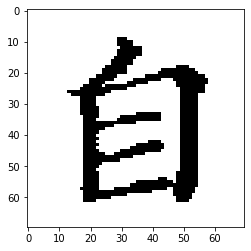

In [201]:
tesseract_config = f'''--psm 10 -c tessedit_char_blacklist={char_blacklist}'''
image = np.hstack([dataset[idx+10][0] for idx in range(1)])
string = "".join([dataset[idx+10][1] for idx in range(1)])
result = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang="chi_ext", config=tesseract_config) #.replace(" ", "").replace("\n_pitch", "")
print(max(result["conf"]))
result = result["text"][-1]
plt.imshow(image)
print("result:", result, "\nground:", string, "equal:", result==string)

In [187]:
print(num_correct/len(dataset)*100)

0.36499522030068654


In [103]:
print(falses)

[['吕', '呂'], ['叫', '無'], [',', '好'], ['滞', '殢'], ['緙', '綠'], ['术', '木'], ['藺', '蘭'], ['監', '夢'], ['谏', '陳'], ['覽', '覔'], ['州', '一'], ['富', '春'], ['夭', '天'], ['禾', '未'], ['干', '二'], ['奎', '金'], ['凌', '陵'], ['此', '北'], ['睚', '挂'], ['蓆', '席'], ['鰥', '綠'], ['繇', '絲'], ['狒', '拂'], ['鸳', '鴛'], ['蕎', '鴦'], ['澡', '喚'], ['鯽', '將'], ['嶼', '與'], ['藺', '蘭'], ['奠', '更'], ['淩', '陵'], ['磷', '舞'], ['寞', '算'], ['永', '水'], ['蜘', '知'], ['满', '滿'], ['唠', '芳'], ['暉', '草'], ['邝', '不'], ['曰', '日'], ['廪', '暮'], ['廩', '更'], ['灝', '移'], [',', '老'], ['子', '予'], ['夸', '今'], ['傅', '傳'], ['炅', '矣'], ['甘', '曰'], ['針', '一'], ['臼', '曰'], ['淒', '濩'], ['闥', '闗'], ['縹', '綠'], ['子', '予'], ['宰', '辛'], ['孑', '予'], ['奎', '金'], ['凌', '陵'], ['.', '工'], ['傩', '作'], ['蒿', '聲'], ['曰', '耳'], ['细', '細'], ['腊', '暗'], ['簧', '黄'], ['愿', '暮'], ['滞', '啼'], ['泸', '一'], ['詬', '訴'], ['-', '琵'], ['王', '玉'], ['嚮', '高'], ['.', '石'], ['洧', '有'], ['洧', '有'], ['日', '曰'], ['菀', '苑'], ['晦', '梅'], ['庑', '院'], ['溯', '湖'], ['蘗', '寒'], ['敞', '故'], ['吸

In [2]:
import json
import numpy as np
import os
import dataclasses
import matplotlib.pyplot as plt
import itertools

@dataclasses.dataclass
class SuzipuAdditionalSymbol:
    ADD_NONE: None = None
    ADD_DA_DUN: str = "DA_DUN"
    ADD_XIAO_ZHU: str = "XIAO_ZHU"
    ADD_DING_ZHU: str = "DING_ZHU"
    ADD_DA_ZHU: str = "DA_ZHU"
    ADD_ZHE: str = "ZHE"
    ADD_YE: str = "YE"

@dataclasses.dataclass
class GongcheMelodySymbol:
    HE: str = "HE"
    XIA_SI: str = "XIA_SI"
    SI: str = "SI"
    XIA_YI: str = "XIA_YI"
    YI: str = "YI"
    SHANG: str = "SHANG"
    GOU: str = "GOU"
    CHE: str = "CHE"
    XIA_GONG: str = "XIA_GONG"
    GONG: str = "GONG"
    XIA_FAN: str = "XIA_FAN"
    FAN: str = "FAN"
    LIU: str = "LIU"
    XIA_WU: str = "XIA_WU"
    WU: str = "WU"
    GAO_WU: str = "GAO_WU"
    
    @classmethod
    def to_simple(cls, symbol):
        try:
            return {
                GongcheMelodySymbol.HE: GongcheMelodySymbol.HE,
                GongcheMelodySymbol.XIA_SI: GongcheMelodySymbol.SI,
                GongcheMelodySymbol.SI: GongcheMelodySymbol.SI,
                GongcheMelodySymbol.XIA_YI: GongcheMelodySymbol.YI,
                GongcheMelodySymbol.YI: GongcheMelodySymbol.YI,
                GongcheMelodySymbol.SHANG: GongcheMelodySymbol.SHANG,
                GongcheMelodySymbol.GOU: GongcheMelodySymbol.GOU,
                GongcheMelodySymbol.CHE: GongcheMelodySymbol.CHE,
                GongcheMelodySymbol.XIA_GONG: GongcheMelodySymbol.GONG,
                GongcheMelodySymbol.GONG: GongcheMelodySymbol.GONG,
                GongcheMelodySymbol.XIA_FAN: GongcheMelodySymbol.FAN,
                GongcheMelodySymbol.FAN: GongcheMelodySymbol.FAN,
                GongcheMelodySymbol.LIU: GongcheMelodySymbol.LIU,
                GongcheMelodySymbol.XIA_WU: GongcheMelodySymbol.WU,
                GongcheMelodySymbol.WU: GongcheMelodySymbol.WU,
                GongcheMelodySymbol.GAO_WU: GongcheMelodySymbol.GAO_WU,
            }[symbol]
        except KeyError:
            return "INVALID"

    @classmethod
    def to_lvlv(cls, symbol):
        try:
            return {
                GongcheMelodySymbol.HE: "黃",
                GongcheMelodySymbol.XIA_SI: "大",
                GongcheMelodySymbol.SI: "太",
                GongcheMelodySymbol.XIA_YI: "夾",
                GongcheMelodySymbol.YI: "姑",
                GongcheMelodySymbol.SHANG: "仲",
                GongcheMelodySymbol.GOU: "蕤",
                GongcheMelodySymbol.CHE: "林",
                GongcheMelodySymbol.XIA_GONG: "夷",
                GongcheMelodySymbol.GONG: "南",
                GongcheMelodySymbol.XIA_FAN: "無",
                GongcheMelodySymbol.FAN: "應",
                GongcheMelodySymbol.LIU: "清黃",
                GongcheMelodySymbol.XIA_WU: "清大",
                GongcheMelodySymbol.WU: "清太",
                GongcheMelodySymbol.GAO_WU: "清夾",
            }[symbol]
        except KeyError:
            return "INVALID"

    @classmethod
    def to_gongche(cls, symbol):
        try:
            return {
                GongcheMelodySymbol.HE: "合",
                GongcheMelodySymbol.XIA_SI: "下四",
                GongcheMelodySymbol.SI: "四",
                GongcheMelodySymbol.XIA_YI: "下一",
                GongcheMelodySymbol.YI: "一",
                GongcheMelodySymbol.SHANG: "上",
                GongcheMelodySymbol.GOU: "勾",
                GongcheMelodySymbol.CHE: "尺",
                GongcheMelodySymbol.XIA_GONG: "下工",
                GongcheMelodySymbol.GONG: "工",
                GongcheMelodySymbol.XIA_FAN: "下凡",
                GongcheMelodySymbol.FAN: "凡",
                GongcheMelodySymbol.LIU: "六",
                GongcheMelodySymbol.XIA_WU: "下五",
                GongcheMelodySymbol.WU: "五",
                GongcheMelodySymbol.GAO_WU: "高五"
            }[symbol]
        except KeyError:
            return "INVALID"

    @classmethod
    def to_index(cls, symbol):
        try:
            return {
                GongcheMelodySymbol.HE: 0,
                GongcheMelodySymbol.XIA_SI: 1,
                GongcheMelodySymbol.SI: 2,
                GongcheMelodySymbol.XIA_YI: 3,
                GongcheMelodySymbol.YI: 4,
                GongcheMelodySymbol.SHANG: 5,
                GongcheMelodySymbol.GOU: 6,
                GongcheMelodySymbol.CHE: 7,
                GongcheMelodySymbol.XIA_GONG: 8,
                GongcheMelodySymbol.GONG: 9,
                GongcheMelodySymbol.XIA_FAN: 10,
                GongcheMelodySymbol.FAN: 11,
                GongcheMelodySymbol.LIU: 12,
                GongcheMelodySymbol.XIA_WU: 13,
                GongcheMelodySymbol.WU: 14,
                GongcheMelodySymbol.GAO_WU: 15
            }[symbol]
        except KeyError:
            return "INVALID"

    @classmethod
    def from_string(cls, str):
        try:
            return {
                "合": "0",
                "下四": "1",
                "四": "2",
                "下一": "3",
                "一": "4",
                "上": "5",
                "勾": "6",
                "尺": "7",
                "下工": "8",
                "工": "9",
                "下凡": "A",
                "凡": "B",
                "六": "C",
                "下五": "D",
                "五": "E",
                "高五": "F",

                "黃": "0",
                "大": "1",
                "太": "2",
                "夾": "3",
                "姑": "4",
                "仲": "5",
                "蕤": "6",
                "林": "7",
                "夷": "8",
                "南": "9",
                "無": "A",
                "應": "B",
                "清黃": "C",
                "清大": "D",
                "清太": "E",
                "清夾": "F",
            }[str]
        except KeyError:
            print(f"'{str}' is not a valid gongche string identifier.")
            return "INVALID"

@dataclasses.dataclass
class Lvlv:
    HUANGZHONG: str = "HUANGZHONG"
    DALV: str = "DALV"
    TAICU: str = "TAICU"
    JIAZHONG: str = "JIAZHONG"
    GUXIAN: str = "GUXIAN"
    ZHONGLV: str = "ZHONGLV"
    RUIBIN: str = "RUIBIN"
    LINZHONG: str = "LINZHONG"
    YIZE: str = "YIZE"
    NANLV: str = "NANLV"
    WUYI: str = "WUYI"
    YINGZHONG: str = "YINGZHONG"

    @classmethod
    def to_name(cls, lvlv):
        try:
            return {
                cls.HUANGZHONG: "黄钟",
                cls.DALV: "大吕",
                cls.TAICU: "太簇",
                cls.JIAZHONG: "夹钟",
                cls.GUXIAN: "姑洗",
                cls.ZHONGLV: "仲吕",
                cls.RUIBIN: "蕤宾",
                cls.LINZHONG: "林钟",
                cls.YIZE: "夷则",
                cls.NANLV: "南吕",
                cls.WUYI: "无射",
                cls.YINGZHONG: "应钟"
            }[lvlv]
        except KeyError:
            print(f"'{lvlv}' is not a valid lülü.")
            return "INVALID"

    @classmethod
    def from_name(cls, string):
        try:
            return {
                "黄钟": cls.HUANGZHONG,
                "大吕": cls.DALV,
                "太簇": cls.TAICU,
                "夹钟": cls.JIAZHONG,
                "姑洗": cls.GUXIAN,
                "仲吕": cls.ZHONGLV,
                "蕤宾": cls.RUIBIN,
                "林钟": cls.LINZHONG,
                "夷则": cls.YIZE,
                "南吕": cls.NANLV,
                "无射": cls.WUYI,
                "应钟": cls.YINGZHONG,
            }[string]
        except KeyError:
            print(f"'{string}' is not a valid lülü name")
            return cls.HUANGZHONG

    @classmethod
    def to_int(cls, lvlv):
        try:
            return {
                cls.HUANGZHONG: 0,
                cls.DALV: 1,
                cls.TAICU: 2,
                cls.JIAZHONG: 3,
                cls.GUXIAN: 4,
                cls.ZHONGLV: 5,
                cls.RUIBIN: 6,
                cls.LINZHONG: 7,
                cls.YIZE: 8,
                cls.NANLV: 9,
                cls.WUYI: 10,
                cls.YINGZHONG: 11,
            }[lvlv]
        except KeyError:
            print(f"'{lvlv}' is not a valid lülü")
            return 0

    @classmethod
    def from_int(cls, int):
        try:
            return {
                0: cls.HUANGZHONG,
                1: cls.DALV,
                2: cls.TAICU,
                3: cls.JIAZHONG,
                4: cls.GUXIAN,
                5: cls.ZHONGLV,
                6: cls.RUIBIN,
                7: cls.LINZHONG,
                8: cls.YIZE,
                9: cls.NANLV,
                10: cls.WUYI,
                11: cls.YINGZHONG,
            }[int]
        except KeyError:
            print(f"'{int}' is not a valid lülü int")
            return cls.HUANGZHONG
        
@dataclasses.dataclass
class GongdiaoStep:
    GONG: str = "GONG"
    SHANG: str = "SHANG"
    JUE: str = "JUE"
    BIAN: str = "BIAN"
    ZHI: str = "ZHI"
    YU: str = "YU"
    RUN: str = "RUN"

    @classmethod
    def to_name(cls, gongdiaostep):
        try:
            return {GongdiaoStep.GONG: "宫",
             GongdiaoStep.SHANG: "商",
             GongdiaoStep.JUE: "角",
             GongdiaoStep.BIAN: "变",
             GongdiaoStep.ZHI: "徵",
             GongdiaoStep.YU: "羽",
             GongdiaoStep.RUN: "闰"}[gongdiaostep]
        except KeyError:
            return "INVALID"

    @classmethod
    def from_name(cls, gongdiaostep):
        try:
            return {"宫": GongdiaoStep.GONG,
                    "商": GongdiaoStep.SHANG,
                    "角": GongdiaoStep.JUE,
                    "变": GongdiaoStep.BIAN,
                    "徵": GongdiaoStep.ZHI,
                    "羽": GongdiaoStep.YU,
                    "闰": GongdiaoStep.RUN}[gongdiaostep]
        except KeyError:
            return GongdiaoStep.GONG
    
    @classmethod
    def to_index(cls, gongdiaostep):
        try:
            return {GongdiaoStep.GONG: 0,
             GongdiaoStep.SHANG: 1,
             GongdiaoStep.JUE: 2,
             GongdiaoStep.BIAN: 3,
             GongdiaoStep.ZHI: 4,
             GongdiaoStep.YU: 5,
             GongdiaoStep.RUN: 6}[gongdiaostep]
        except KeyError:
            return "INVALID"
        
        
class GongdiaoMode:
    def __init__(self, name, chinese_name, tone_inventory: str, final_note: str):
        self.name = name
        self.chinese_name = chinese_name
        self.gong_lvlv = tone_inventory
        self.final_note = final_note

    def check_if_pitch_belongs_to_mode(self, pitch: str, is_suzipu: bool=False):

        if pitch == "" or pitch is None:
            return None
        try:
            pitch_symbol = pitch[0]  # only consider first character
            if is_suzipu:  # in case of suzipu, we must convert it to the pitch which is meant first
                pitch_symbol = self.convert_pitch(pitch_symbol)
            return tone_inventory_check_pitch(self.gong_lvlv, pitch_symbol)
        except:
            return None

    def convert_pitch(self, pitch):
        return tone_inventory_convert_pitch(self.gong_lvlv, pitch)

    def convert_pitches_in_list(self, original_list):
        new_list = []
        for idx in range(len(original_list)):
            try:
                if "secondary" in original_list[idx].keys():
                    new_list.append({"pitch": self.convert_pitch(original_list[idx]["pitch"]), "secondary": original_list[idx]["secondary"]})
                else:
                    new_list.append({"pitch": self.convert_pitch(original_list[idx]["pitch"])})
            except AttributeError:
                new_list.append({"pitch": None})
        return new_list

    def get_properties(self):
        return {"gong_lvlv": self.gong_lvlv, "final_note": self.final_note}


@dataclasses.dataclass
class GongdiaoModeList:
    NO_MODE: GongdiaoMode = GongdiaoMode("*No Mode", "*没有调式", None, None)

    BAN_SHE_DIAO: GongdiaoMode = GongdiaoMode("Ban She Diao", "般涉调", Lvlv.HUANGZHONG, GongdiaoStep.YU)
    DA_SHI_JUE: GongdiaoMode = GongdiaoMode("Da Shi Jue", "大食角", Lvlv.HUANGZHONG, GongdiaoStep.RUN)
    ZHENG_GONG: GongdiaoMode= GongdiaoMode("Zheng Gong", "正宫", Lvlv.HUANGZHONG, GongdiaoStep.GONG)
    DA_SHI_DIAO: GongdiaoMode = GongdiaoMode("Da Shi Diao", "大食调", Lvlv.HUANGZHONG, GongdiaoStep.SHANG)

    HUANG_ZHONG_JUE: GongdiaoMode = GongdiaoMode("*Huang Zhong Jue", "黄钟角", Lvlv.HUANGZHONG, GongdiaoStep.JUE)
    HUANG_ZHONG_ZHI: GongdiaoMode = GongdiaoMode("*Huang Zhong Zhi", "黄钟徵", Lvlv.HUANGZHONG, GongdiaoStep.ZHI)

    GAO_BAN_SHE_DIAO: GongdiaoMode = GongdiaoMode("Gao Ban She Diao", "高般涉调", Lvlv.DALV, GongdiaoStep.YU)
    GAO_DA_SHI_JUE: GongdiaoMode = GongdiaoMode("Gao Da Shi Jue", "高大食角", Lvlv.DALV, GongdiaoStep.RUN)
    GAO_GONG: GongdiaoMode = GongdiaoMode("Gao Gong", "高宫", Lvlv.DALV, GongdiaoStep.GONG)
    GAO_DA_SHI_DIAO: GongdiaoMode = GongdiaoMode("Gao Da Shi Diao", "高大食调", Lvlv.DALV, GongdiaoStep.SHANG)

    ZHONG_LV_DIAO: GongdiaoMode = GongdiaoMode("Zhong Lü Diao", "中吕调", Lvlv.JIAZHONG, GongdiaoStep.YU)
    SHUANG_JUE: GongdiaoMode = GongdiaoMode("Shuang Jue", "双角", Lvlv.JIAZHONG, GongdiaoStep.RUN)
    ZHONG_LV_GONG: GongdiaoMode = GongdiaoMode("Zhong Lü Gong", "中吕宫", Lvlv.JIAZHONG, GongdiaoStep.GONG)
    SHUANG_DIAO: GongdiaoMode = GongdiaoMode("Shuang Diao", "双调", Lvlv.JIAZHONG, GongdiaoStep.SHANG)

    ZHENG_PING_DIAO: GongdiaoMode = GongdiaoMode("Zheng Ping Diao", "正平调", Lvlv.ZHONGLV, GongdiaoStep.YU)
    XIAO_SHI_JUE: GongdiaoMode = GongdiaoMode("Xiao Shi Jue", "小食角", Lvlv.ZHONGLV, GongdiaoStep.RUN)
    DAO_GONG: GongdiaoMode = GongdiaoMode("Dao Gong", "道宫", Lvlv.ZHONGLV, GongdiaoStep.GONG)
    XIAO_SHI_DIAO: GongdiaoMode = GongdiaoMode("Xiao Shi Diao", "小食调", Lvlv.ZHONGLV, GongdiaoStep.SHANG)

    NAN_LV_DIAO: GongdiaoMode = GongdiaoMode("Nan Lü Diao", "南吕调", Lvlv.LINZHONG, GongdiaoStep.YU)  # also 高平调
    XIE_ZHI_JUE: GongdiaoMode = GongdiaoMode("Xie Zhi Jue", "歇指角", Lvlv.LINZHONG, GongdiaoStep.RUN)
    NAN_LV_GONG: GongdiaoMode = GongdiaoMode("Nan Lü Gong", "南吕宫", Lvlv.LINZHONG, GongdiaoStep.GONG)
    XIE_ZHI_DIAO: GongdiaoMode = GongdiaoMode("Xie Zhi Diao", "歇指调", Lvlv.LINZHONG, GongdiaoStep.SHANG)

    XIAN_LV_DIAO: GongdiaoMode = GongdiaoMode("Xian Lü Diao", "仙吕调", Lvlv.YIZE, GongdiaoStep.YU)
    SHANG_JUE: GongdiaoMode = GongdiaoMode("Shang Jue", "商角", Lvlv.YIZE, GongdiaoStep.RUN)
    XIAN_LV_GONG: GongdiaoMode = GongdiaoMode("Xian Lü Gong", "仙吕宫", Lvlv.YIZE, GongdiaoStep.GONG)
    SHANG_DIAO: GongdiaoMode = GongdiaoMode("Shang Diao", "商调", Lvlv.YIZE, GongdiaoStep.SHANG)

    HUANG_ZHONG_DIAO: GongdiaoMode = GongdiaoMode("Huang Zhong Diao", "黄钟调", Lvlv.WUYI, GongdiaoStep.YU)
    YUE_JUE: GongdiaoMode = GongdiaoMode("Yue Jue", "越角", Lvlv.WUYI, GongdiaoStep.RUN)
    HUANG_ZHONG_GONG: GongdiaoMode = GongdiaoMode("Huang Zhong Gong", "黄钟宫", Lvlv.WUYI, GongdiaoStep.GONG)
    YUE_DIAO: GongdiaoMode = GongdiaoMode("Yue Diao", "越调", Lvlv.WUYI, GongdiaoStep.SHANG)

    @classmethod
    def from_string(cls, string):
        for mode in dataclasses.astuple(cls()):
            if string == mode.name or string == mode.chinese_name:
                return mode
        NO_MODE = GongdiaoMode("!!! NO MODE !!!", "！！！没有宫调！！！", Lvlv.HUANGZHONG, GongdiaoStep.GONG)
        #print(f"Could not construct mode from string '{string}'. Returned {cls.NO_MODE.name} instead.")  # TODO: activate?
        return NO_MODE

    @classmethod
    def from_properties(cls, mode_properties):
        try:
            gong_lvlv = mode_properties["gong_lvlv"]
            final_note = mode_properties["final_note"]

            for mode in dataclasses.astuple(cls()):  # first, check if there is already a name stored for this mode
                if mode.gong_lvlv == gong_lvlv and mode.final_note == final_note:
                    return mode

            # otherwise, construct a name for it
            return GongdiaoMode(f"{Lvlv.to_name(gong_lvlv)}均 -- final：{final_note}", f"{Lvlv.to_name(gong_lvlv)}均 -- final：{final_note}", gong_lvlv, final_note)
        except (KeyError, TypeError):
            return GongdiaoModeList.NO_MODE


def get_tone_inventory(lvlv):
    def rotate_list_right(l, idx):
        return [l[(index - idx + len(l)) % len(l)] for index in range(len(l))]

    def extend_tone_inventory(l):
        return l + l[0:4]

    huang_zhong_gong = [GongdiaoStep.GONG, None, GongdiaoStep.SHANG, None, GongdiaoStep.JUE, None, GongdiaoStep.BIAN, GongdiaoStep.ZHI, None, GongdiaoStep.YU, None, GongdiaoStep.RUN]
    return extend_tone_inventory(rotate_list_right(huang_zhong_gong, Lvlv.to_int(lvlv)))

def get_absolute_tone_inventory(lvlv):
        def rotate_list_right(l, idx):
            return [l[(index - idx + len(l)) % len(l)] for index in range(len(l))]

        def extend_tone_inventory(l):
            return l + l[0:4]
        
        if lvlv == Lvlv.LINZHONG:
            huang_zhong_gong = [GongdiaoStep.GONG, None, GongdiaoStep.SHANG, None, GongdiaoStep.JUE, None, None, GongdiaoStep.ZHI, None, GongdiaoStep.YU, None, GongdiaoStep.RUN]
        else:
            huang_zhong_gong = [GongdiaoStep.GONG, None, GongdiaoStep.SHANG, None, GongdiaoStep.JUE, None, GongdiaoStep.BIAN, GongdiaoStep.ZHI, None, GongdiaoStep.YU, None, GongdiaoStep.RUN]
        
        return extend_tone_inventory(rotate_list_right(huang_zhong_gong, Lvlv.to_int(lvlv)))
    
def get_relative_tone_inventory(lvlv):
    if lvlv == Lvlv.LINZHONG: # we need the correct steps, and this one is hexatonic!
        return ['SI', 'YI', 'GOU', 'CHE', 'GONG', 'FAN', None, 'WU']
    else:
        l = []
        for gongche_melody_symbol in dataclasses.astuple(GongcheMelodySymbol()):
            pitch = gongche_melody_symbol if gongche_melody_symbol == strict_tone_inventory_convert_pitch(lvlv, gongche_melody_symbol) else None
            if pitch:
                l.append(GongcheMelodySymbol.to_simple(pitch))
        return l

def tone_inventory_convert_pitch(gong_lvlv, pitch: GongcheMelodySymbol):
    tone_inventory = get_tone_inventory(gong_lvlv)
    def raise_error():
        print(f"Error! Incompatible symbol {pitch} according to tone inventory {tone_inventory}.")
        #raise RuntimeError(f"Error! Incompatible symbol {pitch} according to tone inventory {gong_lvlv}.")

    if pitch == None:
        return None
    # Here, we flip the order, because for Nanlüdiao we need the diatonic steps
    elif pitch == GongcheMelodySymbol.HE:
        #if gong_lvlv[0] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.XIA_SI or pitch == GongcheMelodySymbol.SI:
        if tone_inventory[2] is not None:
            return GongcheMelodySymbol.SI
        elif tone_inventory[1] is not None:
            return GongcheMelodySymbol.XIA_SI
    elif pitch == GongcheMelodySymbol.XIA_YI or pitch == GongcheMelodySymbol.YI:
        if tone_inventory[4] is not None:
            return GongcheMelodySymbol.YI
        elif tone_inventory[3] is not None:
            return GongcheMelodySymbol.XIA_YI
    elif pitch == GongcheMelodySymbol.SHANG:
        #if gong_lvlv[5] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.GOU:  # TODO: Check if GOU, having a separate Suzipu symbol, can become CHE
        #if gong_lvlv[6] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.CHE:
        #if gong_lvlv[7] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.XIA_GONG or pitch == GongcheMelodySymbol.GONG:
        if tone_inventory[9] is not None:
            return GongcheMelodySymbol.GONG
        elif tone_inventory[8] is not None:
            return GongcheMelodySymbol.XIA_GONG
    elif pitch == GongcheMelodySymbol.XIA_FAN or pitch == GongcheMelodySymbol.FAN:
        if tone_inventory[11] is not None:
            return GongcheMelodySymbol.FAN
        elif tone_inventory[10] is not None:
            return GongcheMelodySymbol.XIA_FAN
    elif pitch == GongcheMelodySymbol.LIU:
        #if gong_lvlv[12] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.XIA_WU or pitch == GongcheMelodySymbol.WU:
        if tone_inventory[14] is not None:
            return GongcheMelodySymbol.WU
        elif tone_inventory[13] is not None:
            return GongcheMelodySymbol.XIA_WU
    elif pitch == GongcheMelodySymbol.GAO_WU:
        #if gong_lvlv[15] is not None:
        return pitch

    raise_error()
    
def strict_tone_inventory_convert_pitch(gong_lvlv, pitch: GongcheMelodySymbol):
    tone_inventory = get_tone_inventory(gong_lvlv)
    def raise_error():
        print(f"Error! Incompatible symbol {pitch} according to tone inventory {tone_inventory}.")
        #raise RuntimeError(f"Error! Incompatible symbol {pitch} according to tone inventory {gong_lvlv}.")

    if pitch == None:
        return None
    # Here, we flip the order, because for Nanlüdiao we need the diatonic steps
    elif pitch == GongcheMelodySymbol.HE:
        if tone_inventory[0] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.XIA_SI or pitch == GongcheMelodySymbol.SI:
        if tone_inventory[2] is not None:
            return GongcheMelodySymbol.SI
        elif tone_inventory[1] is not None:
            return GongcheMelodySymbol.XIA_SI
    elif pitch == GongcheMelodySymbol.XIA_YI or pitch == GongcheMelodySymbol.YI:
        if tone_inventory[4] is not None:
            return GongcheMelodySymbol.YI
        elif tone_inventory[3] is not None:
            return GongcheMelodySymbol.XIA_YI
    elif pitch == GongcheMelodySymbol.SHANG:
        if tone_inventory[5] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.GOU:  # TODO: Check if GOU, having a separate Suzipu symbol, can become CHE
        if tone_inventory[6] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.CHE:
        if tone_inventory[7] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.XIA_GONG or pitch == GongcheMelodySymbol.GONG:
        if tone_inventory[9] is not None:
            return GongcheMelodySymbol.GONG
        elif tone_inventory[8] is not None:
            return GongcheMelodySymbol.XIA_GONG
    elif pitch == GongcheMelodySymbol.XIA_FAN or pitch == GongcheMelodySymbol.FAN:
        if tone_inventory[11] is not None:
            return GongcheMelodySymbol.FAN
        elif tone_inventory[10] is not None:
            return GongcheMelodySymbol.XIA_FAN
    elif pitch == GongcheMelodySymbol.LIU:
        if tone_inventory[12] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.XIA_WU or pitch == GongcheMelodySymbol.WU:
        if tone_inventory[14] is not None:
            return GongcheMelodySymbol.WU
        elif tone_inventory[13] is not None:
            return GongcheMelodySymbol.XIA_WU
    elif pitch == GongcheMelodySymbol.GAO_WU:
        if tone_inventory[15] is not None:
            return pitch

    return None

SimpleSuzipuList = [
    GongcheMelodySymbol.HE,
    GongcheMelodySymbol.SI,
    GongcheMelodySymbol.YI,
    GongcheMelodySymbol.SHANG,
    GongcheMelodySymbol.GOU,
    GongcheMelodySymbol.CHE,
    GongcheMelodySymbol.GONG,
    GongcheMelodySymbol.FAN,
    GongcheMelodySymbol.LIU,
    GongcheMelodySymbol.WU,
    GongcheMelodySymbol.GAO_WU
]

In [3]:
import os
import json
import numpy as np

mode_list = []
raw_mode_list = []
def get_folder_contents(path, extension=None):
    file_list = []
    try:
        for file_path in sorted(os.listdir(path)):
            file_path = os.path.join(path, file_path)
            if os.path.isdir(file_path):
                file_list += get_folder_contents(file_path, extension)
            if not extension or file_path.lower().endswith(f'.{extension}'):
                file_list.append(file_path)
    except Exception as e:
        print(f"Could not read files from directory {path}. {e}")
    return file_list

json_files = get_folder_contents("../KuiSCIMA/KuiSCIMA/symbolic_dataset/normalized_edition", "json")

for file_name in json_files:
    with open(file_name, "r") as file_handle:
        segmentation_data = json.load(file_handle)
        mode_list.append(GongdiaoModeList.from_properties(segmentation_data["mode_properties"]).name)
        raw_mode_list.append(segmentation_data["mode_properties"])

In [4]:
names, frequencies = np.unique(mode_list, return_counts=True)

for name, frequency in zip(names, frequencies):
    print(f"{name}: {frequency}")

*Huang Zhong Jue: 1
*Huang Zhong Zhi: 1
Huang Zhong Gong: 2
Nan Lü Diao: 1
Shuang Diao: 2
Xian Lü Diao: 2
Xian Lü Gong: 2
Yue Diao: 2
Zheng Ping Diao: 1
Zhong Lü Diao: 1
Zhong Lü Gong: 2


In [12]:
for mode in raw_mode_list:
    print(mode["gong_lvlv"], mode["final_note"])

YIZE YU
JIAZHONG YU
JIAZHONG SHANG
LINZHONG YU
WUYI GONG
JIAZHONG GONG
JIAZHONG GONG
ZHONGLV YU
WUYI SHANG
YIZE GONG
YIZE GONG
WUYI GONG
HUANGZHONG JUE
HUANGZHONG ZHI
WUYI SHANG
YIZE YU
JIAZHONG SHANG


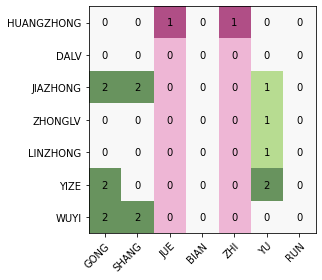

In [88]:
import matplotlib.pyplot as plt
import copy
from matplotlib.colors import TwoSlopeNorm

lvlv = ["HUANGZHONG", "DALV", "JIAZHONG", "ZHONGLV", "LINZHONG", "YIZE", "WUYI"]
step = ["GONG", "SHANG", "JUE", "BIAN", "ZHI", "YU", "RUN"]

data = []
for l in lvlv:
    temp = []
    for st in step:
        value = 0
        for mode in raw_mode_list:
            if mode["gong_lvlv"] == l and mode["final_note"] == st:
                value += 1
        temp.append(value)
    data.append(temp)

plot_data = copy.deepcopy(data)
for l in range(len(lvlv)):
    for s in [2, 4]: # JUE/ZHI
        plot_data[l][s] *= -1
        plot_data[l][s] -= 1

fig, ax = plt.subplots()
im = ax.imshow(plot_data, cmap='PiYG', alpha=0.7)

# Loop over data dimensions and create text annotations.
for i in range(len(lvlv)):
    for j in range(len(step)):
        text = ax.text(j, i, data[i][j], ha="center", va="center", color="black")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(step)), labels=step)
ax.set_yticks(np.arange(len(lvlv)), labels=lvlv)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
#ax.set_title("Composite annotation class distribution")
fig.tight_layout()
plt.show()
fig.savefig("mode_composition.pdf", bbox_inches='tight')

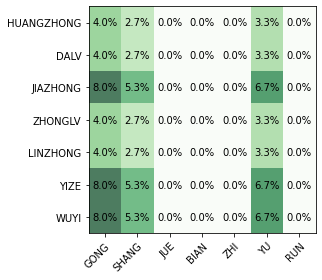

In [89]:
import matplotlib.pyplot as plt
import copy
from matplotlib.colors import TwoSlopeNorm

lvlv = ["HUANGZHONG", "DALV", "JIAZHONG", "ZHONGLV", "LINZHONG", "YIZE", "WUYI"]
step = ["GONG", "SHANG", "JUE", "BIAN", "ZHI", "YU", "RUN"]

step_probs = [
    6/15,
    4/15,
    0,
    0,
    0,
    5/15,
    0,
    ]

lvlv_probs = [
    1/10,
    1/10,
    2/10,
    1/10,
    1/10,
    2/10,
    2/10,
]

data = []
for l in range(len(lvlv)):
    temp = []
    for st in range(len(step)):
        value = 0
        for mode in raw_mode_list:
            value = lvlv_probs[l] * step_probs[st]
        temp.append(value)
    data.append(temp)

plot_data = copy.deepcopy(data)
#for l in range(len(lvlv)):
#    for s in [2, 4]: # JUE/ZHI
#        plot_data[l][s] *= -1
#        plot_data[l][s] -= 1

fig, ax = plt.subplots()
im = ax.imshow(plot_data, cmap='Greens', alpha=0.7)

# Loop over data dimensions and create text annotations.
for i in range(len(lvlv)):
    for j in range(len(step)):
        text = ax.text(j, i, f"{data[i][j]*100:.1f}%", ha="center", va="center", color="black")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(step)), labels=step)
ax.set_yticks(np.arange(len(lvlv)), labels=lvlv)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
#ax.set_title("Composite annotation class distribution")
fig.tight_layout()
plt.show()
fig.savefig("mode_composition_rel.pdf", bbox_inches='tight')